In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
train=pd.read_csv(r'D:\NLP\Fake News Classifier\dataset\train.csv')
test=pd.read_csv(r'D:\NLP\Fake News Classifier\dataset\test.csv')

In [3]:
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [5]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

In [6]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [7]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [8]:
#making train set
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(train['total'].values)
tfidf = transformer.fit_transform(counts)

In [9]:
#making test set
targets = train['label'].values
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = transformer.fit_transform(test_counts)

C:\Users\cspon\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1448: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


In [10]:
print(counts)

  (0, 30750)	1
  (0, 31169)	1
  (0, 34503)	2
  (0, 35987)	1
  (0, 36518)	1
  (0, 42278)	1
  (0, 42370)	1
  (0, 44439)	1
  (0, 44485)	1
  (0, 45915)	2
  (0, 45965)	1
  (0, 46534)	1
  (0, 63691)	1
  (0, 63750)	1
  (0, 72924)	1
  (0, 72945)	1
  (0, 74100)	7
  (0, 75224)	1
  (0, 75463)	1
  (0, 76663)	3
  (0, 76978)	1
  (0, 78392)	1
  (0, 83255)	1
  (0, 83323)	1
  (0, 87923)	3
  :	:
  (20799, 3479289)	1
  (20799, 3479367)	1
  (20799, 3479368)	1
  (20799, 3479407)	1
  (20799, 3479413)	1
  (20799, 3480011)	1
  (20799, 3480012)	1
  (20799, 3480013)	1
  (20799, 3480014)	1
  (20799, 3480024)	1
  (20799, 3480025)	1
  (20799, 3480345)	1
  (20799, 3480346)	1
  (20799, 3484423)	1
  (20799, 3485596)	1
  (20799, 3487038)	3
  (20799, 3487178)	1
  (20799, 3487215)	1
  (20799, 3487256)	1
  (20799, 3495594)	2
  (20799, 3496014)	1
  (20799, 3497266)	1
  (20799, 3500226)	2
  (20799, 3502241)	1
  (20799, 3503379)	1


In [11]:
print(tfidf)

  (0, 3497344)	0.015060231075941708
  (0, 3495594)	0.005328434595494232
  (0, 3489415)	0.02764576008132609
  (0, 3489413)	0.027364244774367073
  (0, 3488916)	0.024622909956955197
  (0, 3487038)	0.006271895561675542
  (0, 3485782)	0.02764576008132609
  (0, 3484423)	0.006561626597938377
  (0, 3470068)	0.01724324388852302
  (0, 3469904)	0.026237338508253345
  (0, 3469834)	0.024371856087464432
  (0, 3469661)	0.09948382964055305
  (0, 3469629)	0.024509376025990695
  (0, 3469379)	0.05228337604650251
  (0, 3466129)	0.0158767682577937
  (0, 3465131)	0.025553672228910987
  (0, 3465129)	0.030918678532037773
  (0, 3465102)	0.02076276491265563
  (0, 3461423)	0.015740361801402918
  (0, 3460993)	0.007666286524882322
  (0, 3447041)	0.013677023651388395
  (0, 3446900)	0.029606842789180316
  (0, 3440984)	0.013744388663798603
  (0, 3436359)	0.029108105986581687
  (0, 3435562)	0.01553410429667931
  :	:
  (20799, 49067)	0.02500016261118273
  (20799, 49052)	0.02500016261118273
  (20799, 49038)	0.0250001626

In [12]:
print(test_counts)

  (0, 123)	6
  (0, 846)	1
  (0, 1638)	2
  (0, 1663)	3
  (0, 3209)	1
  (0, 3211)	1
  (0, 9801)	1
  (0, 9811)	1
  (0, 11874)	1
  (0, 25222)	1
  (0, 25722)	1
  (0, 30750)	2
  (0, 31089)	1
  (0, 33282)	1
  (0, 34253)	1
  (0, 39341)	1
  (0, 39608)	1
  (0, 42278)	2
  (0, 42279)	1
  (0, 42589)	1
  (0, 46664)	1
  (0, 51672)	1
  (0, 51673)	1
  (0, 55227)	2
  (0, 55228)	2
  :	:
  (5199, 3468956)	1
  (5199, 3470498)	4
  (5199, 3470660)	1
  (5199, 3471417)	3
  (5199, 3473924)	1
  (5199, 3473954)	1
  (5199, 3475728)	1
  (5199, 3476761)	1
  (5199, 3476864)	1
  (5199, 3489648)	1
  (5199, 3490391)	1
  (5199, 3491289)	3
  (5199, 3491350)	1
  (5199, 3492038)	1
  (5199, 3492293)	1
  (5199, 3493944)	1
  (5199, 3495093)	1
  (5199, 3495594)	10
  (5199, 3495864)	1
  (5199, 3496014)	1
  (5199, 3497821)	6
  (5199, 3498588)	1
  (5199, 3498634)	1
  (5199, 3498827)	1
  (5199, 3499346)	1


In [13]:
print(test_tfidf)

  (0, 3498473)	0.027934880304470253
  (0, 3495594)	0.004808852934104159
  (0, 3495093)	0.012054996389277343
  (0, 3493944)	0.011197611405564318
  (0, 3492404)	0.02022050633996604
  (0, 3491289)	0.007754156110353429
  (0, 3488195)	0.01081959679392863
  (0, 3487038)	0.0056114692105036544
  (0, 3478760)	0.01481389988536109
  (0, 3477967)	0.008394723258219616
  (0, 3471980)	0.027934880304470253
  (0, 3471636)	0.018644935955211533
  (0, 3471111)	0.02388252683471013
  (0, 3470660)	0.007092496285900272
  (0, 3470498)	0.018629873837579268
  (0, 3468104)	0.025908703569590193
  (0, 3468101)	0.012249300002782175
  (0, 3467822)	0.027934880304470253
  (0, 3467620)	0.01375164316030981
  (0, 3465391)	0.01789680300033572
  (0, 3465102)	0.006231149890851039
  (0, 3464645)	0.02388252683471013
  (0, 3464629)	0.01063303538595706
  (0, 3464561)	0.027934880304470253
  (0, 3464465)	0.017542046388920943
  :	:
  (5199, 113166)	0.016657257897158155
  (5199, 104357)	0.00749239356768706
  (5199, 103199)	0.0555830

In [14]:
#making split for train-test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, random_state=0)

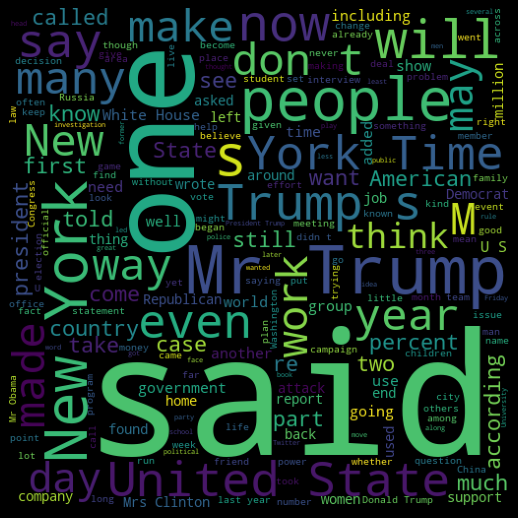

In [15]:

real=' '.join(list(train[train['label']==0]['total']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

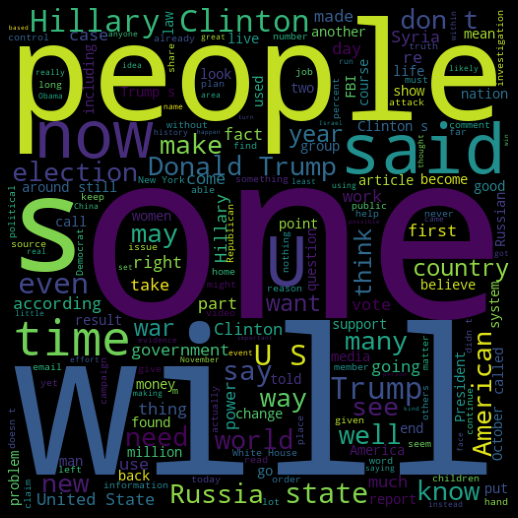

In [16]:

fake=' '.join(list(train[train['label']==1]['total']))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Multinominal NB

In [17]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.78


# Lasso Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,C=1e5,dual=False)
logreg.fit(X_train, y_train)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
RnFr = RandomForestClassifier()
RnFr.fit(X_train, y_train)
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(RnFr.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(RnFr.score(X_test, y_test)))

Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.92


# SVM

In [20]:
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)
svclassifier.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(RnFr.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(RnFr.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.92


# AdaBoostClassifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier= AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
print('Accuracy of AdaBoostClassifier classifier on training set: {:.2f}'
     .format(RnFr.score(X_train, y_train)))
print('Accuracy of AdaBoostClassifier classifier on test set: {:.2f}'
     .format(RnFr.score(X_test, y_test)))

Accuracy of AdaBoostClassifier classifier on training set: 1.00
Accuracy of AdaBoostClassifier classifier on test set: 0.92


# LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
print('Accuracy of LogisticRegression classifier on training set: {:.2f}'
     .format(RnFr.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(RnFr.score(X_test, y_test)))

Accuracy of LogisticRegression classifier on training set: 1.00
Accuracy of LogisticRegression classifier on test set: 0.92
